安定結婚問題をROMを使って実行します
男性の女性に対する選好リスト:
{'M0': ['W2', 'W4', 'W0', 'W3', 'W1'],
 'M1': ['W0', 'W1', 'W2', 'W3', 'W4'],
 'M2': ['W0', 'W3', 'W2', 'W4', 'W1'],
 'M3': ['W1', 'W4', 'W3', 'W0', 'W2'],
 'M4': ['W3', 'W0', 'W4', 'W1', 'W2']}
女性の男性に対する選好リスト:
{'W0': ['M3', 'M0', 'M2', 'M1', 'M4'],
 'W1': ['M4', 'M0', 'M1', 'M2', 'M3'],
 'W2': ['M1', 'M2', 'M0', 'M4', 'M3'],
 'W3': ['M2', 'M3', 'M1', 'M4', 'M0'],
 'W4': ['M2', 'M0', 'M4', 'M1', 'M3']}
組み合わせ結果:
{'M0': 'W2', 'M1': 'W1', 'M2': 'W3', 'M3': 'W0', 'M4': 'W4'}
w(M):23
r(M):4
d(M):1


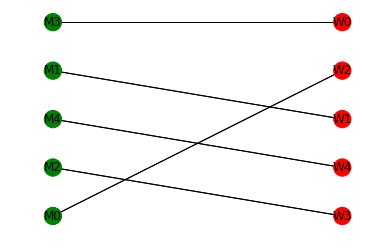

In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pprint
import rom
import crw
import pandas as pd

men_preference = crw.read_dict("men.csv")
women_preference = crw.read_dict("women.csv")

#男女の人数をそれぞれn人とする
n1 = len(men_preference)
n2 = len(women_preference)

if n1 == n2:
    print("安定結婚問題をROMを使って実行します")
    n = n1

    men = ["M" + str(i) for i in range(n)]
    women = ["W" + str(i) for i in range(n)]

    #選好リストの出力
    print ("男性の女性に対する選好リスト:")
    pprint.pprint (men_preference)
    print ("女性の男性に対する選好リスト:")
    pprint.pprint (women_preference)

else:
    print("エラー：男女の数が異なります")
#男女の配列を作成する

#各ノードのサイズを決める
group1 = range(n1)
group2 = range(n1,2*n1)

#ノードの色を決める
node_color = ["g"] * n1
node_color.extend(["r"] * n1)

#グラフgを定義し、ノードを加える
g = nx.Graph()
g.add_nodes_from(men, bipartite=1)
g.add_nodes_from(women, bipartite=0)

gs = rom.stableMatching(n, men, women, men_preference, women_preference)

for (i,j) in itertools.product(group1, group2):
    x="M" + str(i)
    y="W" + str(j-n1)
    if(x,y) in gs.items():
        val = 1
    else:
        val = 0
    g.add_edge(x, y, weight=val)

A,B = bipartite.sets(g)
pos = dict()
pos.update((n,(1,i)) for i,n in enumerate(A))
pos.update((n,(2,i)) for i,n in enumerate(B))

d = nx.max_weight_matching(g)

for (i, j) in list(g.edges()):
    if (i, j) not in d:
        if (j, i) not in d:
            g.remove_edge(i,j)

nx.draw_networkx(g, pos, node_color=node_color)
nx.draw_networkx_edges(g, pos)
plt.axis("off")
plt.show()